# Lead Score - Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.

When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
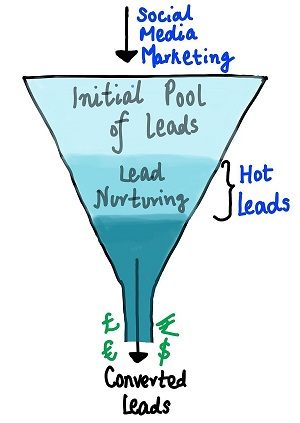

Lead Conversion Process - Demonstrated as a funnel As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

## Goal
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

___All the outcomes and understandings are written in <font color= blue> BLUE</font>___

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visualisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Data Preparation

##  1.1  Import Data 

In [3]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
#checking duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [5]:
df.shape

(9240, 37)

In [6]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [170]:
#To get the idea of how the table looks like we can use .head()  command
df.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent,page_views_per,last_activity,country,specialization,how_did_you,what_is_your,what_matters_most,search,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,tags,lead_quality,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,a_free_copy,last_notable_activity
0,api,olark_chat,no,no,0,0.0,0,0.00,page_visited_on_website,NaN,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,interested_in_other_courses,low_in_relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,api,organic_search,no,no,0,5.0,674,2.50,email_opened,india,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email_opened
2,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.00,email_opened,india,business_administration,NaN,student,better_career_prospects,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,potential_lead,mumbai,02.medium,01.high,14.0,20.0,yes,email_opened
3,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.00,unreachable,india,media_and_advertising,word_of_mouth,unemployed,better_career_prospects,no,no,no,no,no,no,ringing,not_sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,landing_page_submission,google,no,no,1,2.0,1428,1.00,converted_to_lead,india,NaN,other,unemployed,better_career_prospects,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified
5,api,olark_chat,no,no,0,0.0,0,0.00,olark_chat_conversation,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
6,landing_page_submission,google,no,no,1,2.0,1640,2.00,email_opened,india,supply_chain_management,online_search,unemployed,better_career_prospects,no,no,no,no,no,no,will_revert_after_reading_the_email,low_in_relevance,potential_lead,mumbai,02.medium,01.high,14.0,20.0,no,modified
7,api,olark_chat,no,no,0,0.0,0,0.00,olark_chat_conversation,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
8,landing_page_submission,direct_traffic,no,no,0,2.0,71,2.00,email_opened,india,it_projects_management,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,thane_&_outskirts,02.medium,02.medium,14.0,14.0,yes,email_opened
9,api,google,no,no,0,4.0,58,4.00,email_opened,india,finance_management,word_of_mouth,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,mumbai,02.medium,02.medium,13.0,16.0,no,email_opened


In [8]:
#To get an idea of the Range of values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [9]:
# Standardising column names
df.columns = ['_'.join(colname.lower().split()[:3]) for colname in df.columns]

#standardising categorical values
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.lower().str.replace(' ', '_').str.strip())

# Taking a look at all unique values for every column to check for abnormalities/inconsistencies
for col in df.columns[2:]:
    print(col.upper(), end=': ')
    print(df[col].unique())
    print()

LEAD_ORIGIN: ['api' 'landing_page_submission' 'lead_add_form' 'lead_import'
 'quick_add_form']

LEAD_SOURCE: ['olark_chat' 'organic_search' 'direct_traffic' 'google' 'referral_sites'
 'welingak_website' 'reference' 'facebook' nan 'blog' 'pay_per_click_ads'
 'bing' 'social_media' 'welearn' 'click2call' 'live_chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']

DO_NOT_EMAIL: ['no' 'yes']

DO_NOT_CALL: ['no' 'yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

TOTAL_TIME_SPENT: [   0  674 1532 ...  603  483  927]

PAGE_VIEWS_PER: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.  

## Anamolies in column values:
By going through the above unique entires of every column, the following inconsistencies has been observed:

lead_source -> WeLearn and WeLearnblog_home are one and the same. Facebook and social media are two different categories.

country -> "Australia", the asian Countries and "Asia/Pacific Region" are two different categories.

tags -> "invalid number" and "wrong number given" are one and the same.



## Other potential issues:
1. Many columns exist with only a single category (Redundant columns).
2. The value 'Select' may be replaced to NaN.


In [10]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
df = df.replace('select', np.nan)

In [11]:
df[['prospect_id', 'lead_number', 'magazine', 'receive_more_updates', 'update_me_on', 'get_updates_on', 'i_agree_to']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   prospect_id           9240 non-null   object
 1   lead_number           9240 non-null   int64 
 2   magazine              9240 non-null   object
 3   receive_more_updates  9240 non-null   object
 4   update_me_on          9240 non-null   object
 5   get_updates_on        9240 non-null   object
 6   i_agree_to            9240 non-null   object
dtypes: int64(1), object(6)
memory usage: 505.4+ KB


In [12]:
# removing redundant columns
df.drop(['prospect_id', 'lead_number', 'magazine', 'receive_more_updates', 'update_me_on', 'get_updates_on', 'i_agree_to' ], axis=1, inplace=True)
df.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent,page_views_per,last_activity,country,specialization,how_did_you,what_is_your,what_matters_most,search,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,tags,lead_quality,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,a_free_copy,last_notable_activity
0,api,olark_chat,no,no,0,0.0,0,0.0,page_visited_on_website,NaN,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,interested_in_other_courses,low_in_relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,api,organic_search,no,no,0,5.0,674,2.5,email_opened,india,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email_opened
2,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,email_opened,india,business_administration,NaN,student,better_career_prospects,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,potential_lead,mumbai,02.medium,01.high,14.0,20.0,yes,email_opened
3,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,unreachable,india,media_and_advertising,word_of_mouth,unemployed,better_career_prospects,no,no,no,no,no,no,ringing,not_sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,landing_page_submission,google,no,no,1,2.0,1428,1.0,converted_to_lead,india,NaN,other,unemployed,better_career_prospects,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified


In [13]:
# inspecting the shape
df.shape

(9240, 30)

In [14]:
# replacing "wrong number given" with "invalid number"
df.tags = df.tags.replace("wrong_number_given", "invalid_number")

In [15]:
# Checking the percentage of missing values after dropping unique valued columns
round(100*(df.isnull().sum().sort_values(ascending=False)/len(df)), 2)

how_did_you                    78.46
lead_profile                   74.19
lead_quality                   51.59
asymmetrique_profile_score     45.65
asymmetrique_activity_score    45.65
asymmetrique_profile_index     45.65
asymmetrique_activity_index    45.65
city                           39.71
specialization                 36.58
tags                           36.29
what_matters_most              29.32
what_is_your                   29.11
country                        26.63
page_views_per                  1.48
totalvisits                     1.48
last_activity                   1.11
lead_source                     0.39
a_free_copy                     0.00
lead_origin                     0.00
newspaper_article               0.00
through_recommendations         0.00
digital_advertisement           0.00
newspaper                       0.00
x_education_forums              0.00
search                          0.00
total_time_spent                0.00
converted                       0.00
d

In [16]:
# Removing all the redundant columns that have more than 45% null values
df1 = df.drop(['asymmetrique_profile_score', 'asymmetrique_activity_score', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 'how_did_you', 'lead_profile', 'lead_quality'],axis=1)
df1.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent,page_views_per,last_activity,country,specialization,what_is_your,what_matters_most,search,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,tags,city,a_free_copy,last_notable_activity
0,api,olark_chat,no,no,0,0.0,0,0.0,page_visited_on_website,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,interested_in_other_courses,NaN,no,modified
1,api,organic_search,no,no,0,5.0,674,2.5,email_opened,india,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,ringing,NaN,no,email_opened
2,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,email_opened,india,business_administration,student,better_career_prospects,no,no,no,no,no,no,will_revert_after_reading_the_email,mumbai,yes,email_opened
3,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,unreachable,india,media_and_advertising,unemployed,better_career_prospects,no,no,no,no,no,no,ringing,mumbai,no,modified
4,landing_page_submission,google,no,no,1,2.0,1428,1.0,converted_to_lead,india,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,will_revert_after_reading_the_email,mumbai,no,modified


In [17]:
df1.shape

(9240, 23)

In [18]:
# Rechecking the percentage of missing values
round(100*(df1.isnull().sum().sort_values(ascending=False)/len(df1)), 2)

city                       39.71
specialization             36.58
tags                       36.29
what_matters_most          29.32
what_is_your               29.11
country                    26.63
totalvisits                 1.48
page_views_per              1.48
last_activity               1.11
lead_source                 0.39
x_education_forums          0.00
a_free_copy                 0.00
through_recommendations     0.00
digital_advertisement       0.00
newspaper                   0.00
lead_origin                 0.00
newspaper_article           0.00
search                      0.00
total_time_spent            0.00
converted                   0.00
do_not_call                 0.00
do_not_email                0.00
last_notable_activity       0.00
dtype: float64

In [19]:
df1.what_matters_most.describe()

count                        6531
unique                          3
top       better_career_prospects
freq                         6528
Name: what_matters_most, dtype: object

In [20]:
df1.specialization.describe()

count                   5860
unique                    18
top       finance_management
freq                     976
Name: specialization, dtype: object

In [21]:
df1.what_is_your.describe()

count           6550
unique             6
top       unemployed
freq            5600
Name: what_is_your, dtype: object

In [22]:
df1.country.describe()

count      6779
unique       38
top       india
freq       6492
Name: country, dtype: object

<font color= blue>___There is a huge value of null values in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___</font>

In [23]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list, may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values. 
df1['specialization'] = df1['specialization'].fillna('others') 
# Blanks in the this column may be imputed by 'Better Career Prospects' as it has higher frequency nearly 70%.
df1['what_matters_most'] = df1['what_matters_most'].fillna('better_career_prospects')
# Country is India for most values(~68%) so let's impute the same in missing values.
df1['country'] = df1['country'].fillna('india')
# 60% of the vales are unemployed, so we can impute missing values with unemployed
df1['what_is_your'] = df1['what_is_your'].fillna('unemployed')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lead_origin              9240 non-null   object 
 1   lead_source              9204 non-null   object 
 2   do_not_email             9240 non-null   object 
 3   do_not_call              9240 non-null   object 
 4   converted                9240 non-null   int64  
 5   totalvisits              9103 non-null   float64
 6   total_time_spent         9240 non-null   int64  
 7   page_views_per           9103 non-null   float64
 8   last_activity            9137 non-null   object 
 9   country                  9240 non-null   object 
 10  specialization           9240 non-null   object 
 11  what_is_your             9240 non-null   object 
 12  what_matters_most        9240 non-null   object 
 13  search                   9240 non-null   object 
 14  newspaper_article       

In [24]:
# Rechecking the percentage of missing values
round(100*(df1.isnull().sum().sort_values(ascending=False)/len(df1)), 2)

city                       39.71
tags                       36.29
totalvisits                 1.48
page_views_per              1.48
last_activity               1.11
lead_source                 0.39
lead_origin                 0.00
newspaper_article           0.00
a_free_copy                 0.00
through_recommendations     0.00
digital_advertisement       0.00
newspaper                   0.00
x_education_forums          0.00
what_is_your                0.00
search                      0.00
what_matters_most           0.00
specialization              0.00
country                     0.00
total_time_spent            0.00
converted                   0.00
do_not_call                 0.00
do_not_email                0.00
last_notable_activity       0.00
dtype: float64

In [25]:
# Few Columns have less than 2% na values. We can afford to drop their respective rows altogether. 
df1.dropna(subset=['totalvisits', 'page_views_per', 'lead_source', 'last_activity'], inplace=True)

In [26]:
df1.shape

(9074, 23)

In [27]:
# Rechecking the percentage of missing values
round(100*(df1.isnull().sum().sort_values(ascending=False)/len(df1)), 2)

city                       39.40
tags                       36.67
lead_origin                 0.00
what_matters_most           0.00
a_free_copy                 0.00
through_recommendations     0.00
digital_advertisement       0.00
newspaper                   0.00
x_education_forums          0.00
newspaper_article           0.00
search                      0.00
what_is_your                0.00
lead_source                 0.00
specialization              0.00
country                     0.00
last_activity               0.00
page_views_per              0.00
total_time_spent            0.00
totalvisits                 0.00
converted                   0.00
do_not_call                 0.00
do_not_email                0.00
last_notable_activity       0.00
dtype: float64

## Tags 
It can not be removed as it leads to loss of data, as it is related to status of conversion of leads

In [28]:
df1['tags'].value_counts(dropna=False)

NaN                                                  3327
will_revert_after_reading_the_email                  2016
ringing                                              1187
interested_in_other_courses                           509
already_a_student                                     465
closed_by_horizzon                                    301
switched_off                                          240
busy                                                  185
lost_to_eins                                          172
not_doing_further_education                           145
invalid_number                                        130
interested__in_full_time_mba                          116
graduation_in_progress                                111
diploma_holder_(not_eligible)                          63
opp_hangup                                             33
number_not_provided                                    25
in_touch_with_eins                                     12
lost_to_others

#  Tag column
The variables like tags are statuses created by the sales team once they contact the potential lead. These variables will not be available for the model building as these features would not be available before the lead is being contacted.

In [29]:
df1 = df1.drop(['tags'],axis=1)

## City Column
As there is almost 40% unknown values, we cannot impute with mode as it is make the whole data skewed. Also, X-Education is online teaching platform. The city information will not be much useful as potential students can available any courses online despite their city. We will drop the column from analysis.

In [30]:
df1.isnull().sum().sort_values(ascending=False).head(1)

city    3575
dtype: int64

In [31]:
df1 = df1.drop(['city'],axis=1)

## Last Activity 

In [32]:
df1.last_activity.describe()

count             9074
unique              17
top       email_opened
freq              3432
Name: last_activity, dtype: object

In [33]:
# Rechecking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1)), 2)

lead_origin                0.0
lead_source                0.0
do_not_email               0.0
do_not_call                0.0
converted                  0.0
totalvisits                0.0
total_time_spent           0.0
page_views_per             0.0
last_activity              0.0
country                    0.0
specialization             0.0
what_is_your               0.0
what_matters_most          0.0
search                     0.0
newspaper_article          0.0
x_education_forums         0.0
newspaper                  0.0
digital_advertisement      0.0
through_recommendations    0.0
a_free_copy                0.0
last_notable_activity      0.0
dtype: float64

In [34]:
# Checking the percent of loss if the null values are removed
round(100*(df1.size/df.size),2)

68.74

In [35]:
# Code for checking number of rows left in percent
round(100*(df1.shape[0])/(df.shape[0]),2)

98.2

In [36]:
# Code for checking number of columns left in percent
round(100*(df1.shape[1])/(df.shape[1]),2)

70.0

In [37]:
# Rechecking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1)), 2)

lead_origin                0.0
lead_source                0.0
do_not_email               0.0
do_not_call                0.0
converted                  0.0
totalvisits                0.0
total_time_spent           0.0
page_views_per             0.0
last_activity              0.0
country                    0.0
specialization             0.0
what_is_your               0.0
what_matters_most          0.0
search                     0.0
newspaper_article          0.0
x_education_forums         0.0
newspaper                  0.0
digital_advertisement      0.0
through_recommendations    0.0
a_free_copy                0.0
last_notable_activity      0.0
dtype: float64

## 2. EDA

### 2.1. Univariate Analysis

#### 2.1.1. Categorical Variables

In [38]:
df_final=df1
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lead_origin              9074 non-null   object 
 1   lead_source              9074 non-null   object 
 2   do_not_email             9074 non-null   object 
 3   do_not_call              9074 non-null   object 
 4   converted                9074 non-null   int64  
 5   totalvisits              9074 non-null   float64
 6   total_time_spent         9074 non-null   int64  
 7   page_views_per           9074 non-null   float64
 8   last_activity            9074 non-null   object 
 9   country                  9074 non-null   object 
 10  specialization           9074 non-null   object 
 11  what_is_your             9074 non-null   object 
 12  what_matters_most        9074 non-null   object 
 13  search                   9074 non-null   object 
 14  newspaper_article       

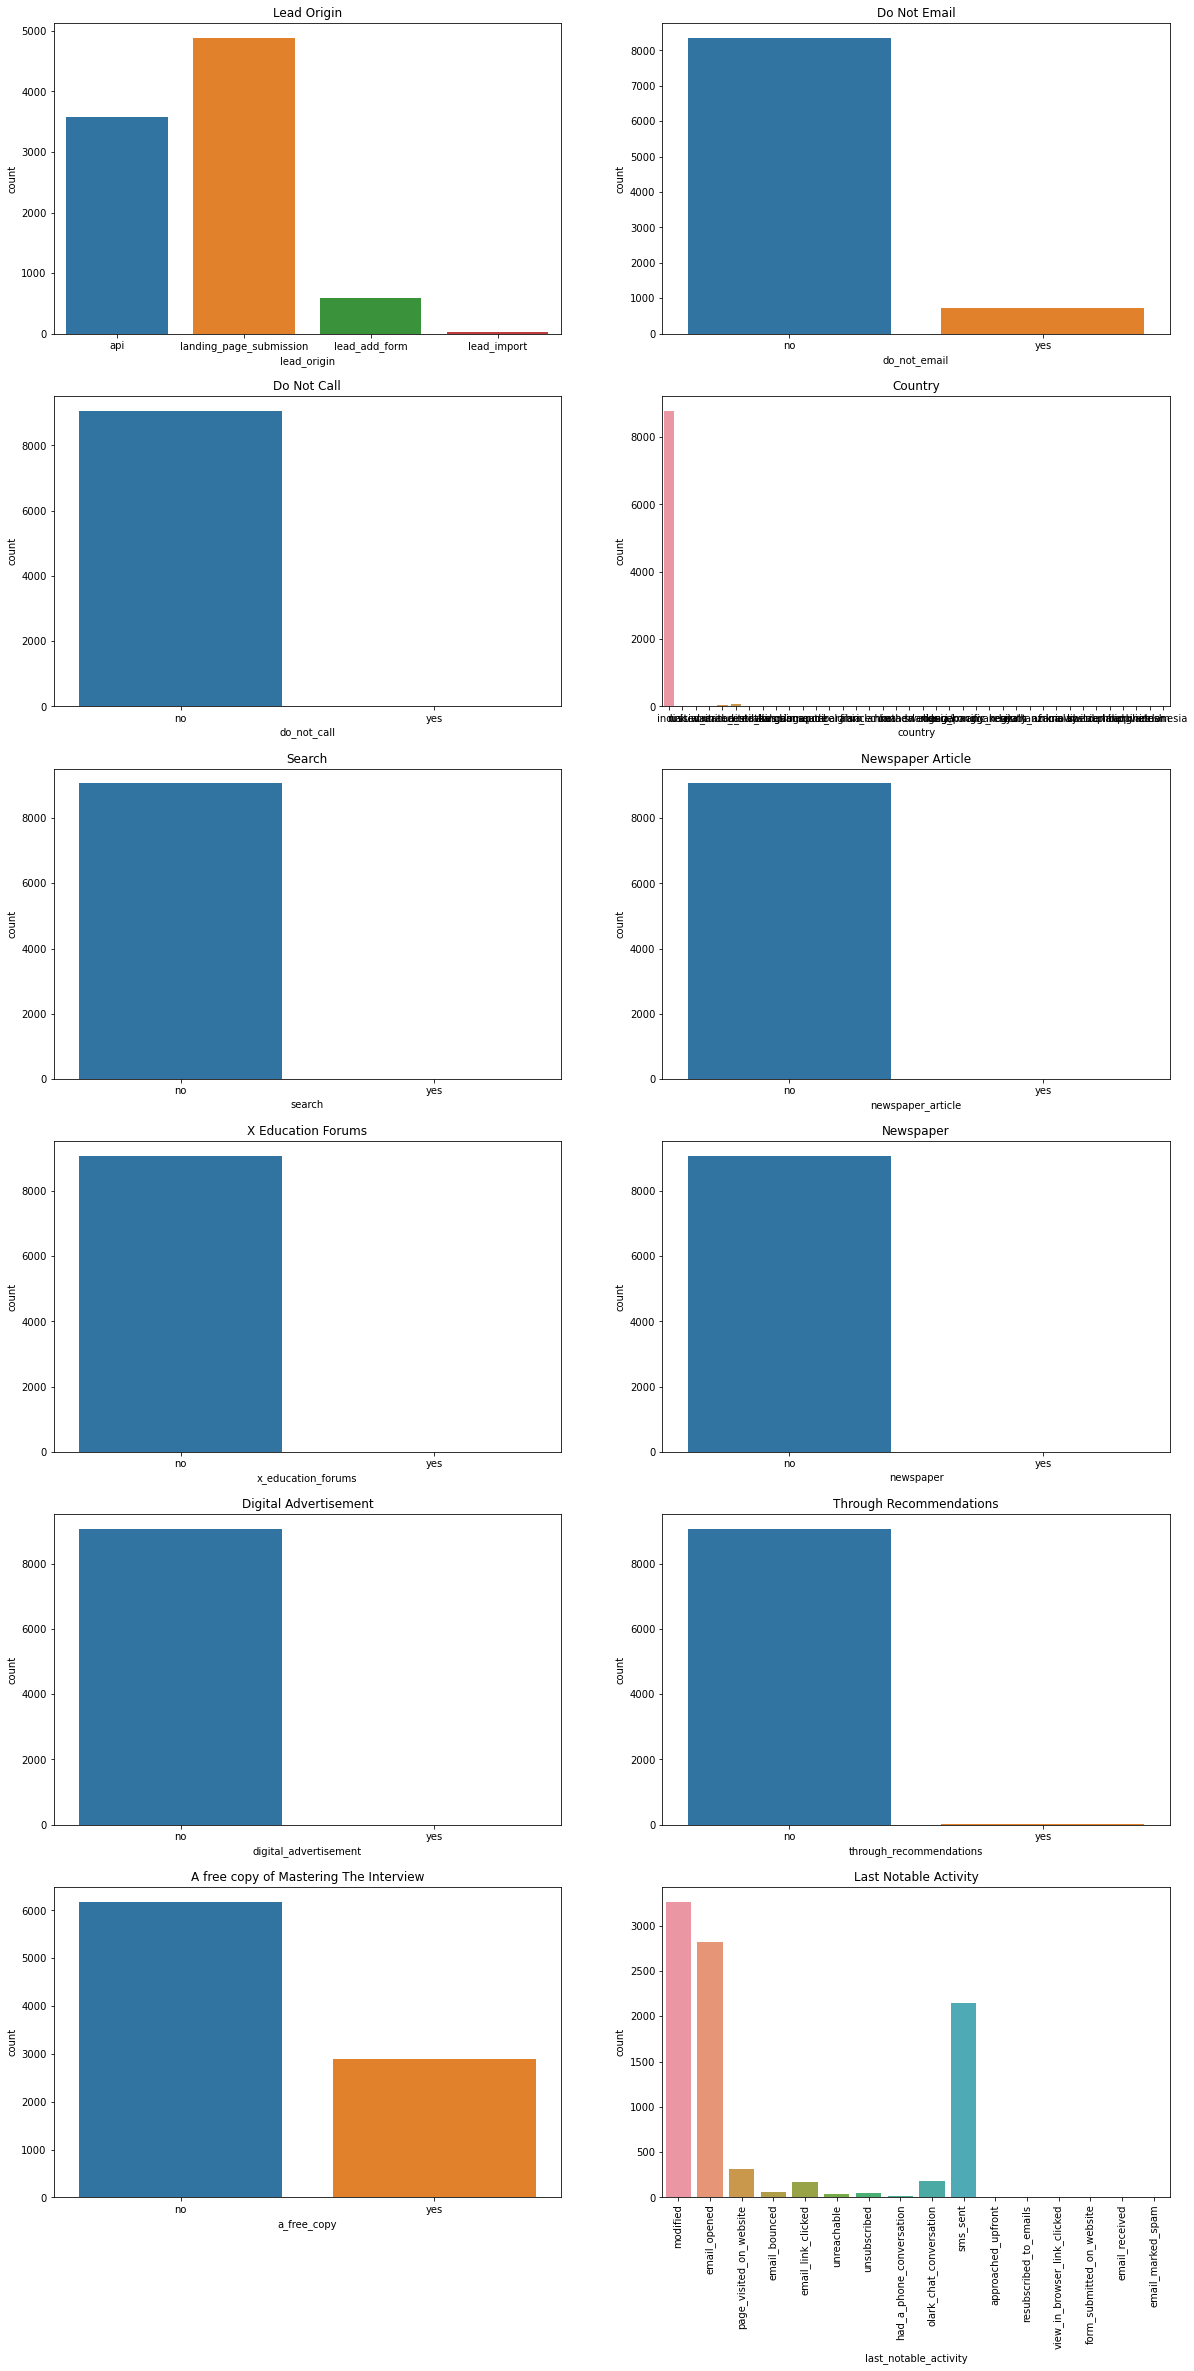

In [39]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_final['lead_origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_final['do_not_email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_final['do_not_call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_final['country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_final['search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_final['newspaper_article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_final['x_education_forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_final['newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_final['digital_advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_final['through_recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_final['a_free_copy'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_final['last_notable_activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

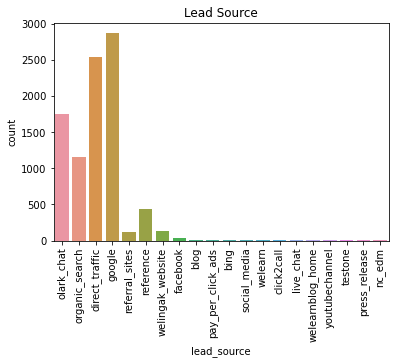

In [40]:
sns.countplot(df_final['lead_source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

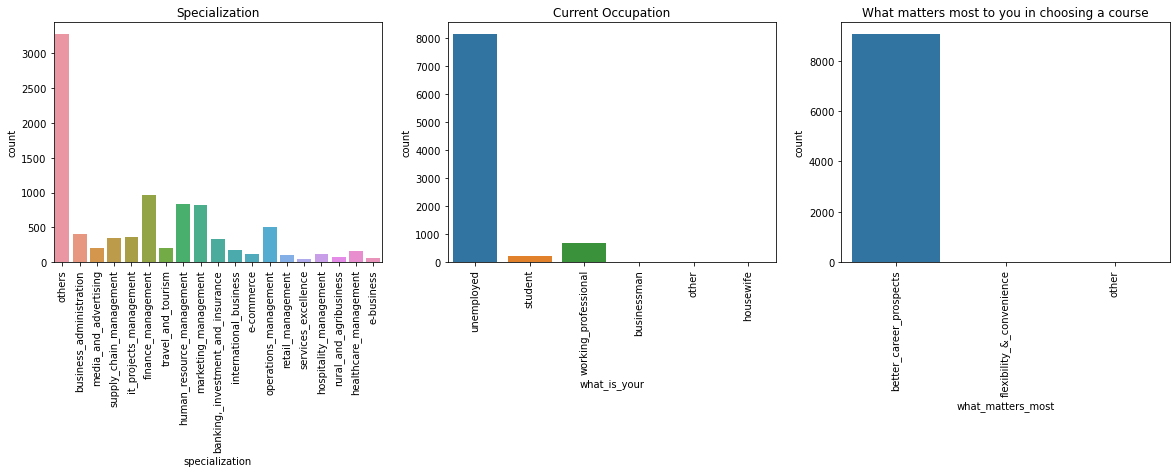

In [41]:
plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
sns.countplot(df_final['specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(3,3,2)
sns.countplot(df_final['what_is_your']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(3,3,3)
sns.countplot(df_final['what_matters_most']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.show()

## Target Variable

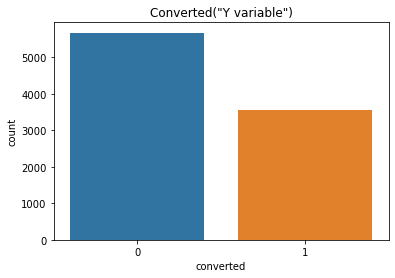

In [42]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
sns.countplot(df['converted'])
plt.title('Converted("Y variable")')
plt.show()

#### 2.1.1. Numerical Variables

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lead_origin              9074 non-null   object 
 1   lead_source              9074 non-null   object 
 2   do_not_email             9074 non-null   object 
 3   do_not_call              9074 non-null   object 
 4   converted                9074 non-null   int64  
 5   totalvisits              9074 non-null   float64
 6   total_time_spent         9074 non-null   int64  
 7   page_views_per           9074 non-null   float64
 8   last_activity            9074 non-null   object 
 9   country                  9074 non-null   object 
 10  specialization           9074 non-null   object 
 11  what_is_your             9074 non-null   object 
 12  what_matters_most        9074 non-null   object 
 13  search                   9074 non-null   object 
 14  newspaper_article       

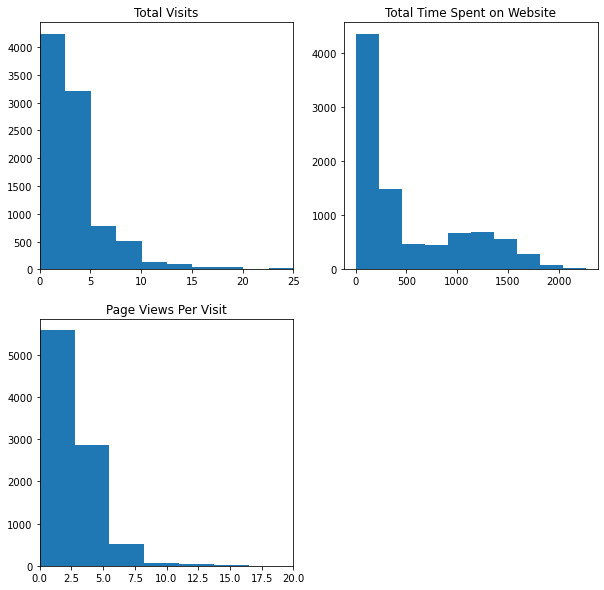

In [44]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['totalvisits'], bins = 100)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['total_time_spent'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['page_views_per'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.1. Relating all the categorical variables to Target Variable

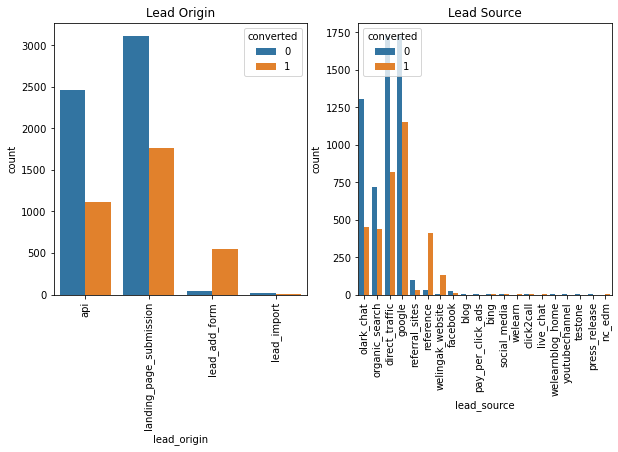

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='lead_origin', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='lead_source', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

## Inference
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead add form are not very high.
3. Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

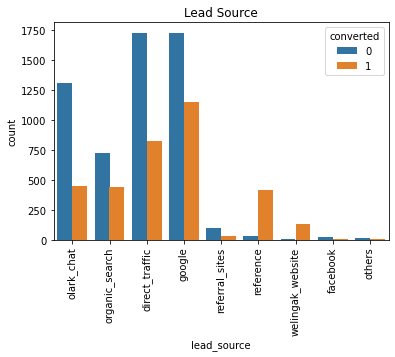

In [46]:
df_final['lead_source'] = df_final['lead_source'].replace(['click2call', 'live_chat', 'nc_edm', 'pay_per_click_ads', 'press_release',
  'social_media', 'welearn', 'bing', 'blog', 'testone', 'welearnblog_home', 'youtubechannel'], 'others')
sns.countplot(x='lead_source', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()


## Inference
1.Google and Direct traffic generates maximum number of leads.

2.Conversion Rate of reference leads and leads through welingak website is high.


To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

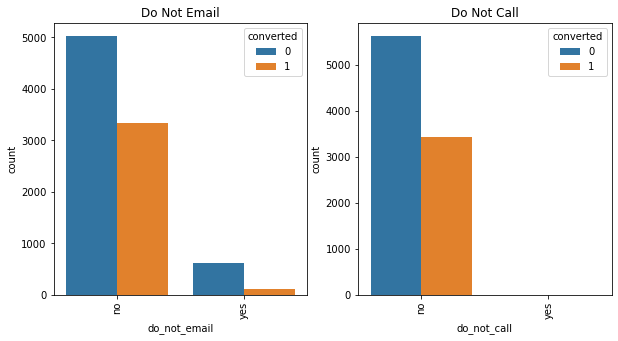

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='do_not_email', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='do_not_call', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

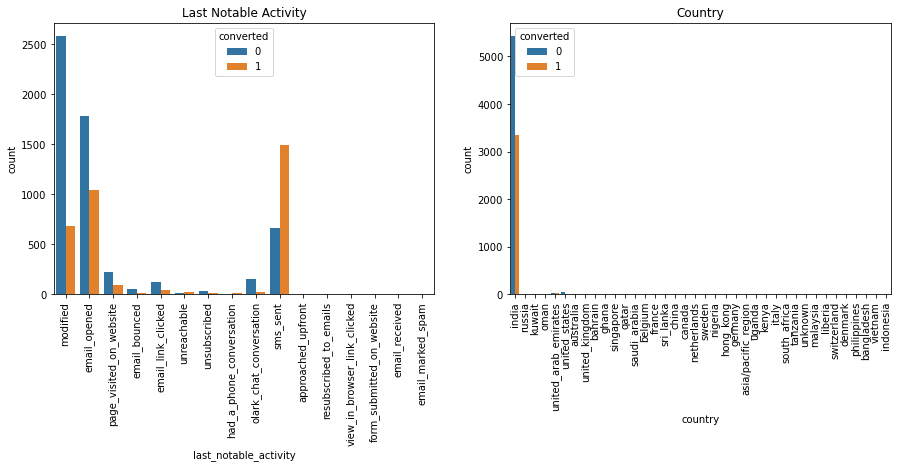

In [48]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='last_notable_activity', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(1,2,2)
sns.countplot(x='country', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

## Inference
Most values are 'India' no such inference can be drawn

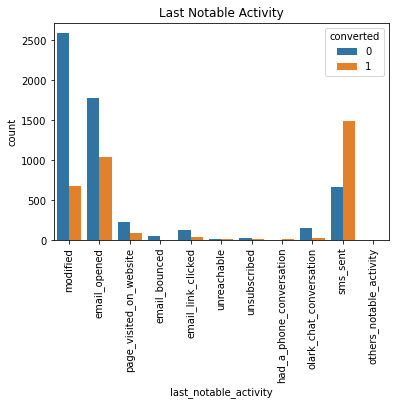

In [49]:
df_final['last_notable_activity'] = df_final['last_notable_activity'].replace(['approached_upfront', 'resubscribed_to_emails',
 'view_in_browser_link_clicked', 'form_submitted_on_website','email_received', 'email_marked_spam'], 'others_notable_activity')
sns.countplot(x='last_notable_activity', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

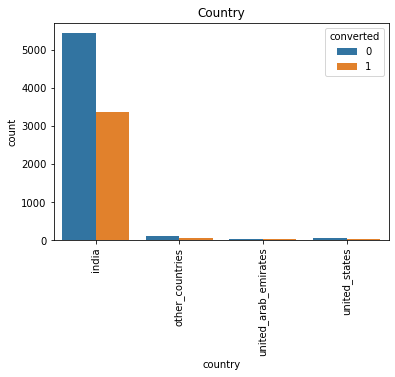

In [50]:
df_final['country'] = df_final['country'].replace(['russia', 'kuwait', 'oman', 'australia', 'united_kingdom', 'bahrain', 'ghana', 'singapore', 'qatar', 'saudi_arabia', 'belgium', 'france', 'sri_lanka', 'china',
 'canada', 'netherlands', 'sweden', 'nigeria', 'hong_kong', 'germany', 'asia/pacific_region', 'uganda', 'kenya', 'italy', 'south_africa', 'tanzania','unknown', 'malaysia', 'liberia', 'switzerland', 'denmark', 'philippines',
 'bangladesh', 'vietnam', 'indonesia'], 'other_countries')
sns.countplot(x='country', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

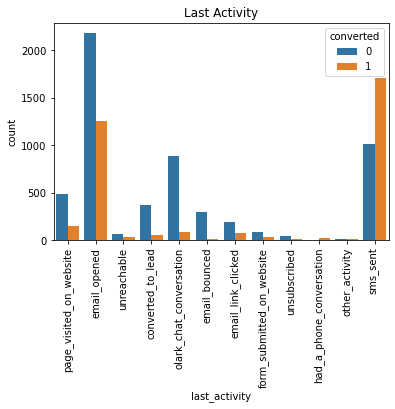

In [51]:
df_final['last_activity'] = df_final['last_activity'].replace(['approached_upfront', 'resubscribed_to_emails',
 'view_in_browser_link_clicked', 'visited_booth_in_tradeshow','email_received', 'email_marked_spam'], 'other_activity')
sns.countplot(x='last_activity', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

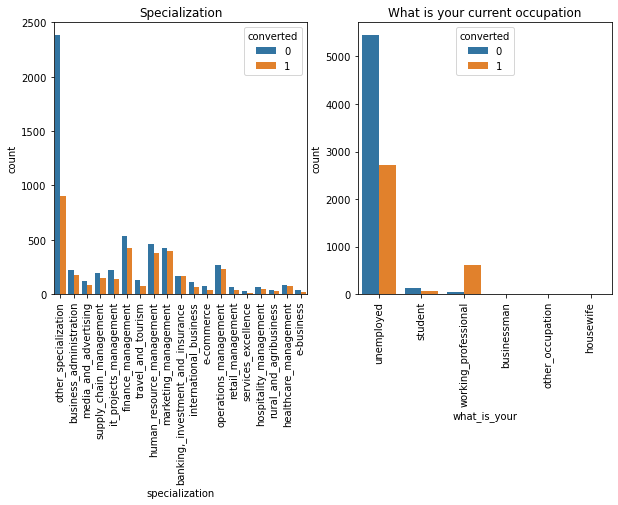

In [52]:
df_final['specialization'] = df_final['specialization'].replace(['others'], 'other_specialization')
df_final['what_is_your'] = df_final['what_is_your'].replace(['other'], 'other_occupation')
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='specialization', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='what_is_your', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

## Inference

1. Focus should be more on the Specialization with high conversion rate.
2. Working Professionals going for the course have high rate of conversion.
3. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

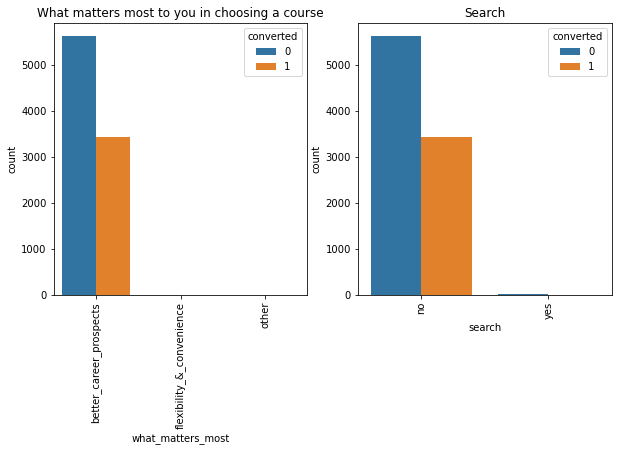

In [53]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='what_matters_most', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='search', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

## Inference
1. Most of the entries in 'what_matters_most" are 'Better Career Prospects'. No Inference can be drawn with this parameter.

2. Most entries in "search" are 'No'. No Inference can be drawn with this parameter.

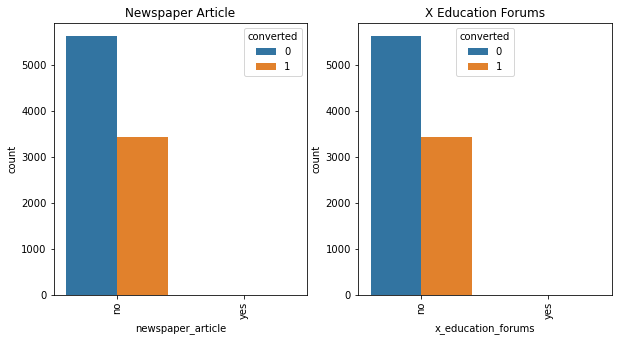

In [54]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='newspaper_article', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='x_education_forums', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

## Inference
1. Most Newspaper Article entries are 'No'. No Inference can be drawn with this parameter.
2. Most X Education Forums entries are 'No'. No Inference can be drawn with this parameter.

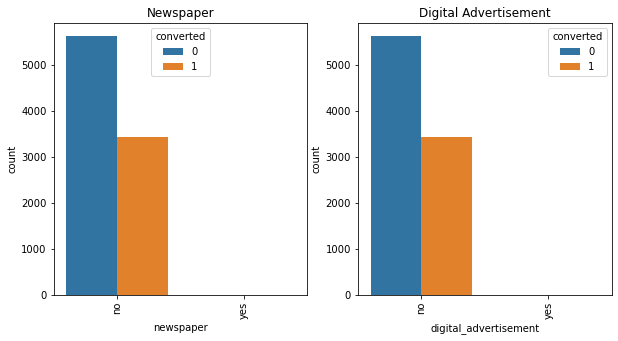

In [55]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='newspaper', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='digital_advertisement', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

## Inference
1. Most entries in Newspaper are 'No'. No Inference can be drawn with this parameter.
2. Most entries in Digital Advertisement are 'No'. No Inference can be drawn with this parameter.

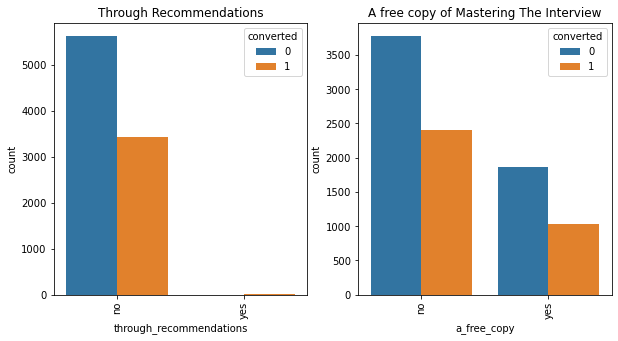

In [56]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='through_recommendations', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='a_free_copy', hue='converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

## Inference
1. Most entries in through_recommendations are 'No'. No Inference can be drawn with this parameter.


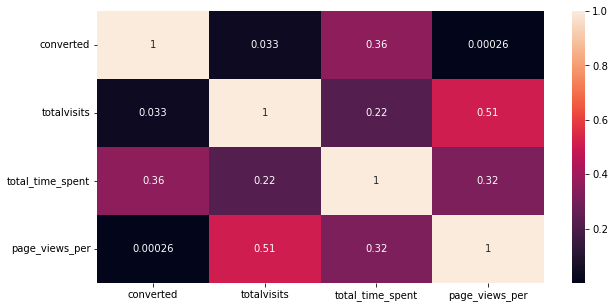

In [57]:
# To check the correlation among numeric varibles
plt.figure(figsize=(10,5))
sns.heatmap(df_final.corr(), annot=True)
plt.show()

<font color= green>___It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.___</font>

In [58]:
numeric = df_final[['totalvisits','total_time_spent','page_views_per']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,totalvisits,total_time_spent,page_views_per
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


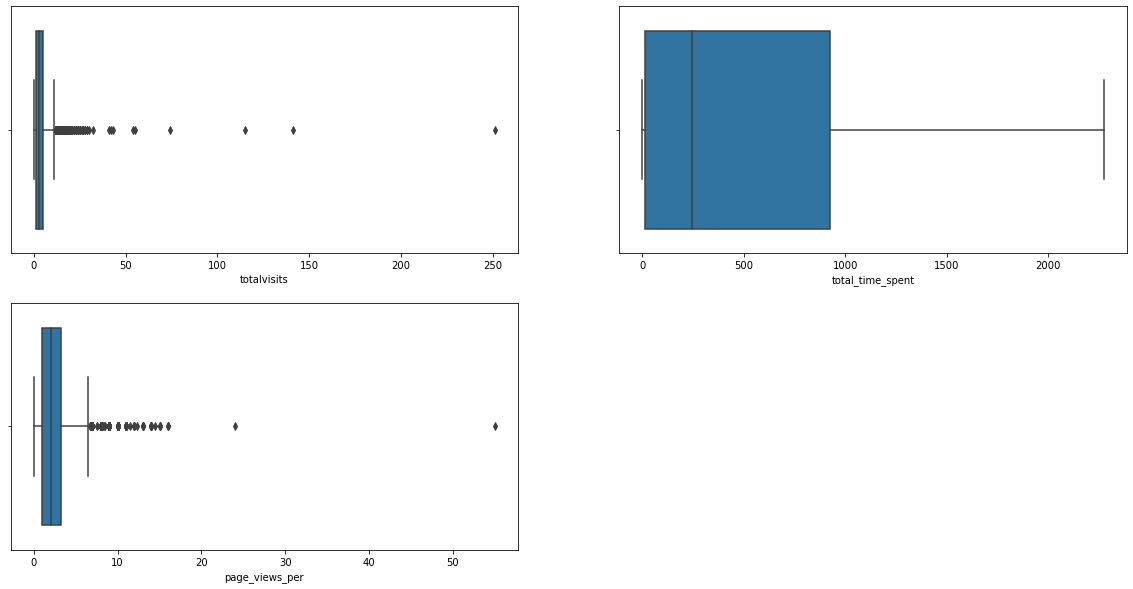

In [59]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(df_final['totalvisits'])

plt.subplot(2,2,2)
sns.boxplot(df_final['total_time_spent'])

plt.subplot(2,2,3)
sns.boxplot(df_final['page_views_per'])
plt.show()

In [60]:
percentiles = df_final['totalvisits'].quantile([0.00,0.99]).values
df_final['totalvisits'][df_final['totalvisits'] <= percentiles[0]] = percentiles[0]
df_final['totalvisits'][df_final['totalvisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='converted', ylabel='totalvisits'>

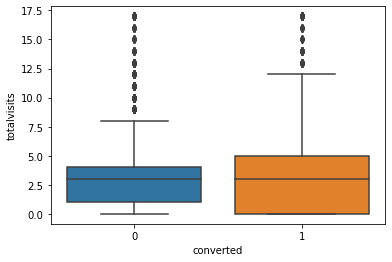

In [61]:
sns.boxplot(y = 'totalvisits', x = 'converted', data = df_final)

<AxesSubplot:xlabel='converted', ylabel='page_views_per'>

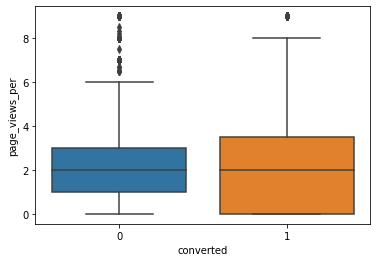

In [62]:
percentiles = df_final['page_views_per'].quantile([0.00,0.99]).values
df_final['page_views_per'][df_final['page_views_per'] <= percentiles[0]] = percentiles[0]
df_final['page_views_per'][df_final['page_views_per'] >= percentiles[1]] = percentiles[1]

sns.boxplot(y = 'page_views_per', x = 'converted', data = df_final)

<AxesSubplot:xlabel='converted', ylabel='total_time_spent'>

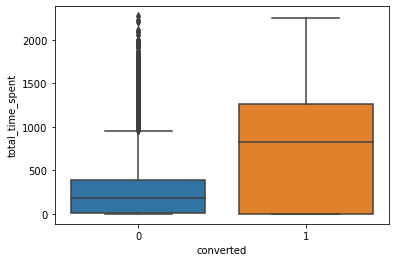

In [63]:
sns.boxplot(y = 'total_time_spent', x = 'converted', data = df_final)

There is no outliers present in the 'total_time_spent' column.

## Redundant columns with single category value

Last Notable Activity is an intermediate column which is a status update while the sales team representative is in touch with the lead

In [64]:
df_final1 = df_final.drop(['what_matters_most', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 'last_notable_activity'], axis=1)
df_final1.shape

(9074, 12)

In [65]:
df_final1.head()

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent,page_views_per,last_activity,country,specialization,what_is_your,a_free_copy
0,api,olark_chat,no,0,0.0,0,0.0,page_visited_on_website,india,other_specialization,unemployed,no
1,api,organic_search,no,0,5.0,674,2.5,email_opened,india,other_specialization,unemployed,no
2,landing_page_submission,direct_traffic,no,1,2.0,1532,2.0,email_opened,india,business_administration,student,yes
3,landing_page_submission,direct_traffic,no,0,1.0,305,1.0,unreachable,india,media_and_advertising,unemployed,no
4,landing_page_submission,google,no,1,2.0,1428,1.0,converted_to_lead,india,other_specialization,unemployed,no


## 3. Dummy Variables

In [66]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lead_origin       9074 non-null   object 
 1   lead_source       9074 non-null   object 
 2   do_not_email      9074 non-null   object 
 3   converted         9074 non-null   int64  
 4   totalvisits       9074 non-null   float64
 5   total_time_spent  9074 non-null   int64  
 6   page_views_per    9074 non-null   float64
 7   last_activity     9074 non-null   object 
 8   country           9074 non-null   object 
 9   specialization    9074 non-null   object 
 10  what_is_your      9074 non-null   object 
 11  a_free_copy       9074 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.2+ MB


In [67]:
df_final1.loc[:, df_final1.dtypes == 'object'].columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
       'country', 'specialization', 'what_is_your', 'a_free_copy'],
      dtype='object')

In [68]:
# Create dummy variables using the 'get_dummies'
df_dummy = pd.get_dummies(df_final1[['lead_origin', 'lead_source', 'do_not_email',
       'last_activity', 'country', 'specialization', 'what_is_your',
       'a_free_copy', ]], drop_first=True)
# Add the results to the master dataframe
df_dummy.head()

,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,last_activity_email_bounced,last_activity_email_link_clicked,last_activity_email_opened,last_activity_form_submitted_on_website,last_activity_had_a_phone_conversation,last_activity_olark_chat_conversation,last_activity_other_activity,last_activity_page_visited_on_website,last_activity_sms_sent,last_activity_unreachable,last_activity_unsubscribed,country_other_countries,country_united_arab_emirates,country_united_states,specialization_business_administration,specialization_e-business,specialization_e-commerce,specialization_finance_management,specialization_healthcare_management,specialization_hospitality_management,specialization_human_resource_management,specialization_international_business,specialization_it_projects_management,specialization_marketing_management,specialization_media_and_advertising,specialization_operations_management,specialization_other_specialization,specialization_retail_management,specialization_rural_and_agribusiness,specialization_services_excellence,specialization_supply_chain_management,specialization_travel_and_tourism,what_is_your_housewife,what_is_your_other_occupation,what_is_your_student,what_is_your_unemployed,what_is_your_working_professional,a_free_copy_yes
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [69]:
# Adding the results to the master dataframe
df_final2 = pd.concat([df_final1, df_dummy], axis=1)
df_final2.head()

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent,page_views_per,last_activity,country,specialization,what_is_your,a_free_copy,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,last_activity_email_bounced,last_activity_email_link_clicked,last_activity_email_opened,last_activity_form_submitted_on_website,last_activity_had_a_phone_conversation,last_activity_olark_chat_conversation,last_activity_other_activity,last_activity_page_visited_on_website,last_activity_sms_sent,last_activity_unreachable,last_activity_unsubscribed,country_other_countries,country_united_arab_emirates,country_united_states,specialization_business_administration,specialization_e-business,specialization_e-commerce,specialization_finance_management,specialization_healthcare_management,specialization_hospitality_management,specialization_human_resource_management,specialization_international_business,specialization_it_projects_management,specialization_marketing_management,specialization_media_and_advertising,specialization_operations_management,specialization_other_specialization,specialization_retail_management,specialization_rural_and_agribusiness,specialization_services_excellence,specialization_supply_chain_management,specialization_travel_and_tourism,what_is_your_housewife,what_is_your_other_occupation,what_is_your_student,what_is_your_unemployed,what_is_your_working_professional,a_free_copy_yes
0,api,olark_chat,no,0,0.0,0,0.0,page_visited_on_website,india,other_specialization,unemployed,no,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,api,organic_search,no,0,5.0,674,2.5,email_opened,india,other_specialization,unemployed,no,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,landing_page_submission,direct_traffic,no,1,2.0,1532,2.0,email_opened,india,business_administration,student,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,landing_page_submission,direct_traffic,no,0,1.0,305,1.0,unreachable,india,media_and_advertising,unemployed,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,landing_page_submission,google,no,1,2.0,1428,1.0,converted_to_lead,india,other_specialization,unemployed,no,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [70]:
df_final_lead = df_final2.drop(['lead_origin', 'lead_source', 'do_not_email',
       'last_activity', 'country', 'specialization', 'what_is_your',
        'a_free_copy'], axis=1)
df_final_lead.head()

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,last_activity_email_bounced,last_activity_email_link_clicked,last_activity_email_opened,last_activity_form_submitted_on_website,last_activity_had_a_phone_conversation,last_activity_olark_chat_conversation,last_activity_other_activity,last_activity_page_visited_on_website,last_activity_sms_sent,last_activity_unreachable,last_activity_unsubscribed,country_other_countries,country_united_arab_emirates,country_united_states,specialization_business_administration,specialization_e-business,specialization_e-commerce,specialization_finance_management,specialization_healthcare_management,specialization_hospitality_management,specialization_human_resource_management,specialization_international_business,specialization_it_projects_management,specialization_marketing_management,specialization_media_and_advertising,specialization_operations_management,specialization_other_specialization,specialization_retail_management,specialization_rural_and_agribusiness,specialization_services_excellence,specialization_supply_chain_management,specialization_travel_and_tourism,what_is_your_housewife,what_is_your_other_occupation,what_is_your_student,what_is_your_unemployed,what_is_your_working_professional,a_free_copy_yes
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [71]:
df_final_lead.shape

(9074, 54)

In [72]:
df_final_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   converted                                 9074 non-null   int64  
 1   totalvisits                               9074 non-null   float64
 2   total_time_spent                          9074 non-null   int64  
 3   page_views_per                            9074 non-null   float64
 4   lead_origin_landing_page_submission       9074 non-null   uint8  
 5   lead_origin_lead_add_form                 9074 non-null   uint8  
 6   lead_origin_lead_import                   9074 non-null   uint8  
 7   lead_source_facebook                      9074 non-null   uint8  
 8   lead_source_google                        9074 non-null   uint8  
 9   lead_source_olark_chat                    9074 non-null   uint8  
 10  lead_source_organic_search          

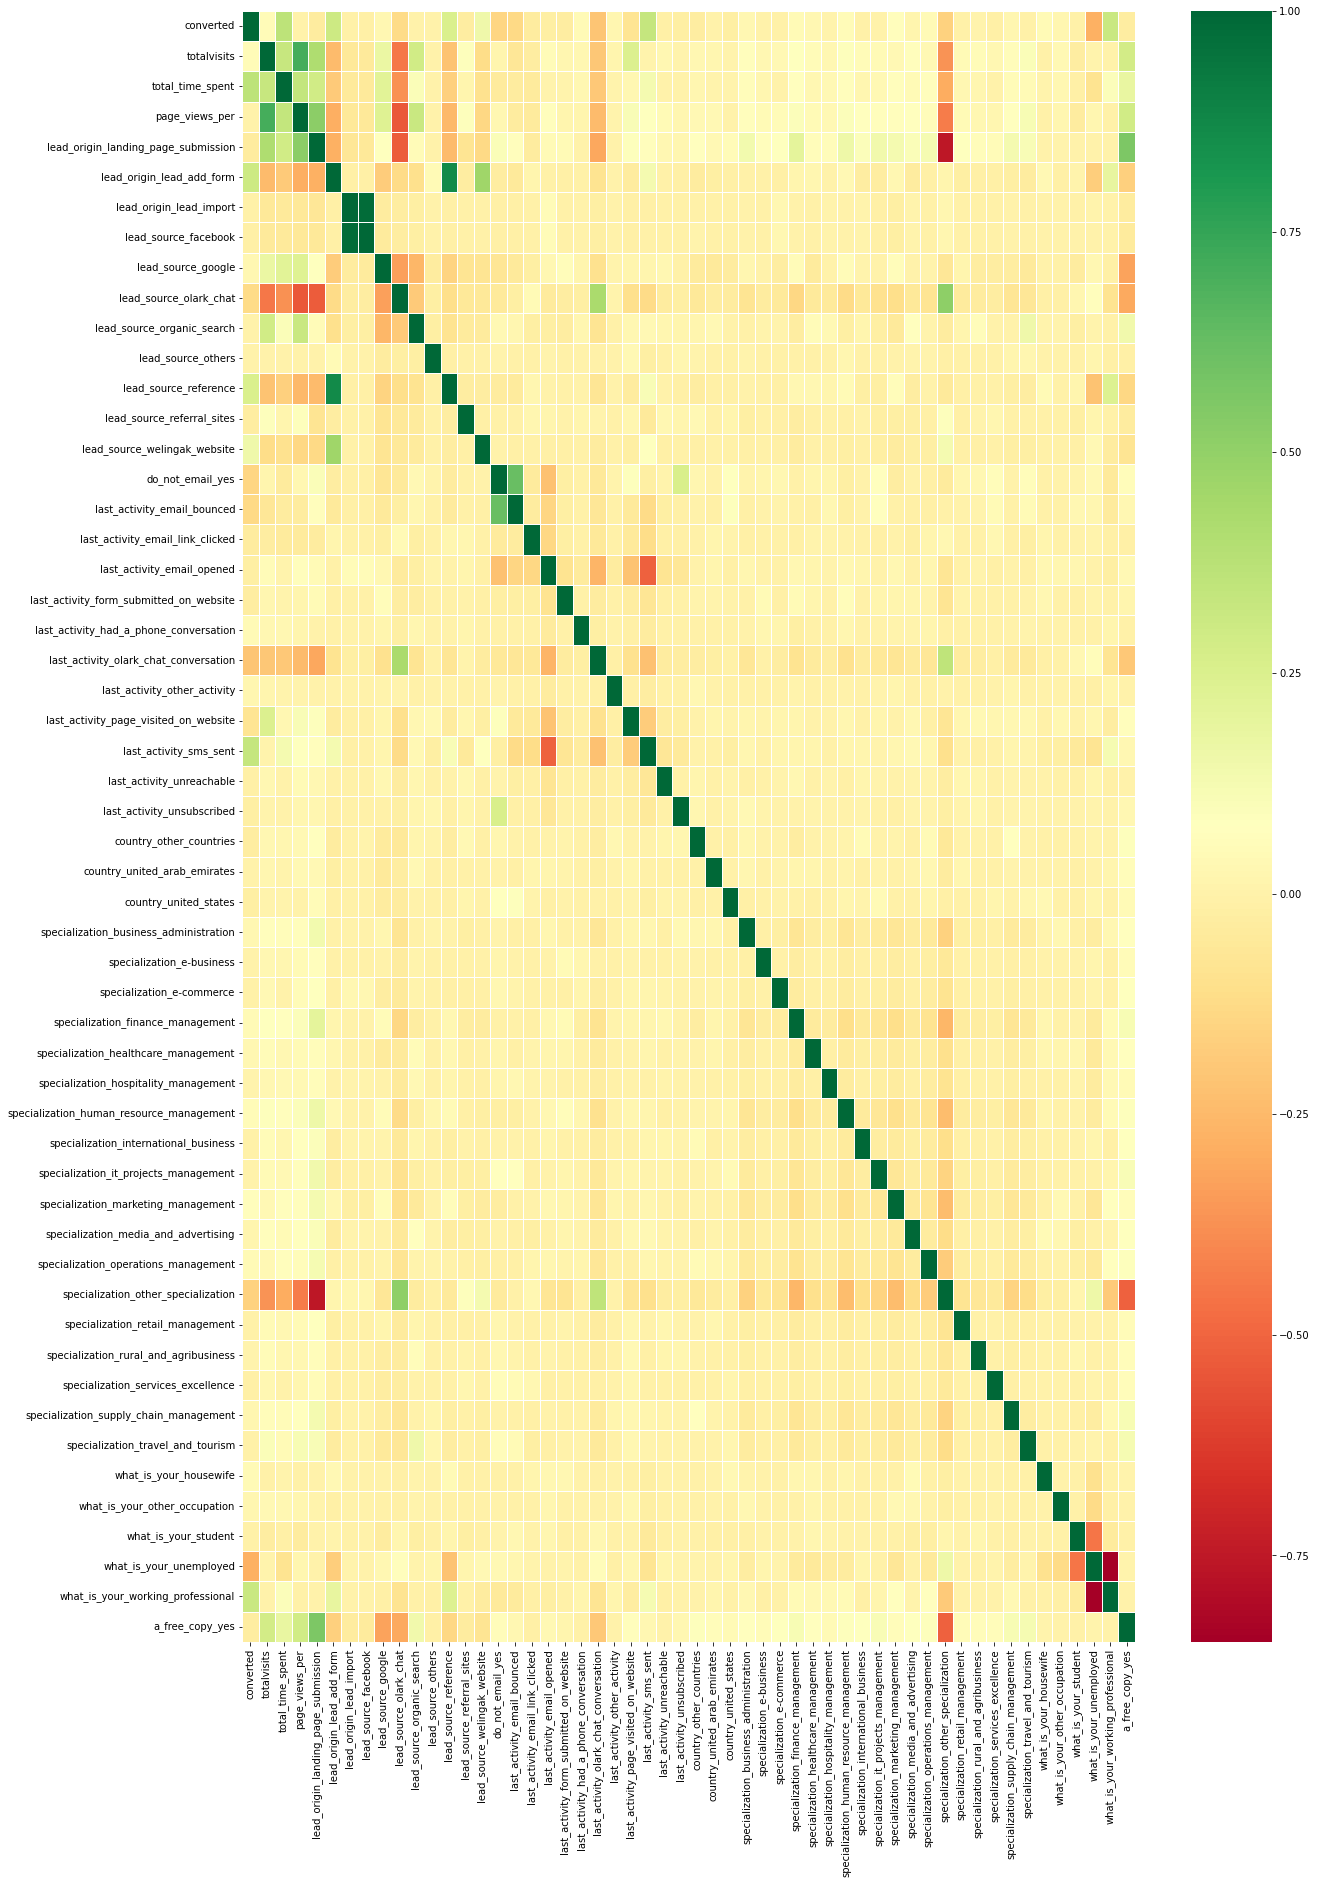

In [73]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(df_final_lead.corr(),cmap="RdYlGn",linewidth =1)
plt.show()

## 4. Test-Train Split

In [74]:
# Import the required library
from sklearn.model_selection import train_test_split

In [75]:
X = df_final_lead.drop(['converted'], 1)
X.head()

,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,last_activity_email_bounced,last_activity_email_link_clicked,last_activity_email_opened,last_activity_form_submitted_on_website,last_activity_had_a_phone_conversation,last_activity_olark_chat_conversation,last_activity_other_activity,last_activity_page_visited_on_website,last_activity_sms_sent,last_activity_unreachable,last_activity_unsubscribed,country_other_countries,country_united_arab_emirates,country_united_states,specialization_business_administration,specialization_e-business,specialization_e-commerce,specialization_finance_management,specialization_healthcare_management,specialization_hospitality_management,specialization_human_resource_management,specialization_international_business,specialization_it_projects_management,specialization_marketing_management,specialization_media_and_advertising,specialization_operations_management,specialization_other_specialization,specialization_retail_management,specialization_rural_and_agribusiness,specialization_services_excellence,specialization_supply_chain_management,specialization_travel_and_tourism,what_is_your_housewife,what_is_your_other_occupation,what_is_your_student,what_is_your_unemployed,what_is_your_working_professional,a_free_copy_yes
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [76]:
# Putting the target variable in y
y = df_final_lead['converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [77]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [78]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['totalvisits','total_time_spent','page_views_per']] = scaler.fit_transform(X_train[['totalvisits','total_time_spent','page_views_per']])
X_train.head()

,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,last_activity_email_bounced,last_activity_email_link_clicked,last_activity_email_opened,last_activity_form_submitted_on_website,last_activity_had_a_phone_conversation,last_activity_olark_chat_conversation,last_activity_other_activity,last_activity_page_visited_on_website,last_activity_sms_sent,last_activity_unreachable,last_activity_unsubscribed,country_other_countries,country_united_arab_emirates,country_united_states,specialization_business_administration,specialization_e-business,specialization_e-commerce,specialization_finance_management,specialization_healthcare_management,specialization_hospitality_management,specialization_human_resource_management,specialization_international_business,specialization_it_projects_management,specialization_marketing_management,specialization_media_and_advertising,specialization_operations_management,specialization_other_specialization,specialization_retail_management,specialization_rural_and_agribusiness,specialization_services_excellence,specialization_supply_chain_management,specialization_travel_and_tourism,what_is_your_housewife,what_is_your_other_occupation,what_is_your_student,what_is_your_unemployed,what_is_your_working_professional,a_free_copy_yes
3009,0.117647,0.178347,0.222222,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1012,0.117647,0.085355,0.222222,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4750,0.117647,0.619946,0.222222,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7987,0.294118,0.711590,0.277778,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [79]:
# Checking the Churn Rate
Converted = (sum(df_final_lead['converted'])/len(df_final_lead['converted'].index))*100
Converted

37.85541106458012

## We have almost 38% conversion

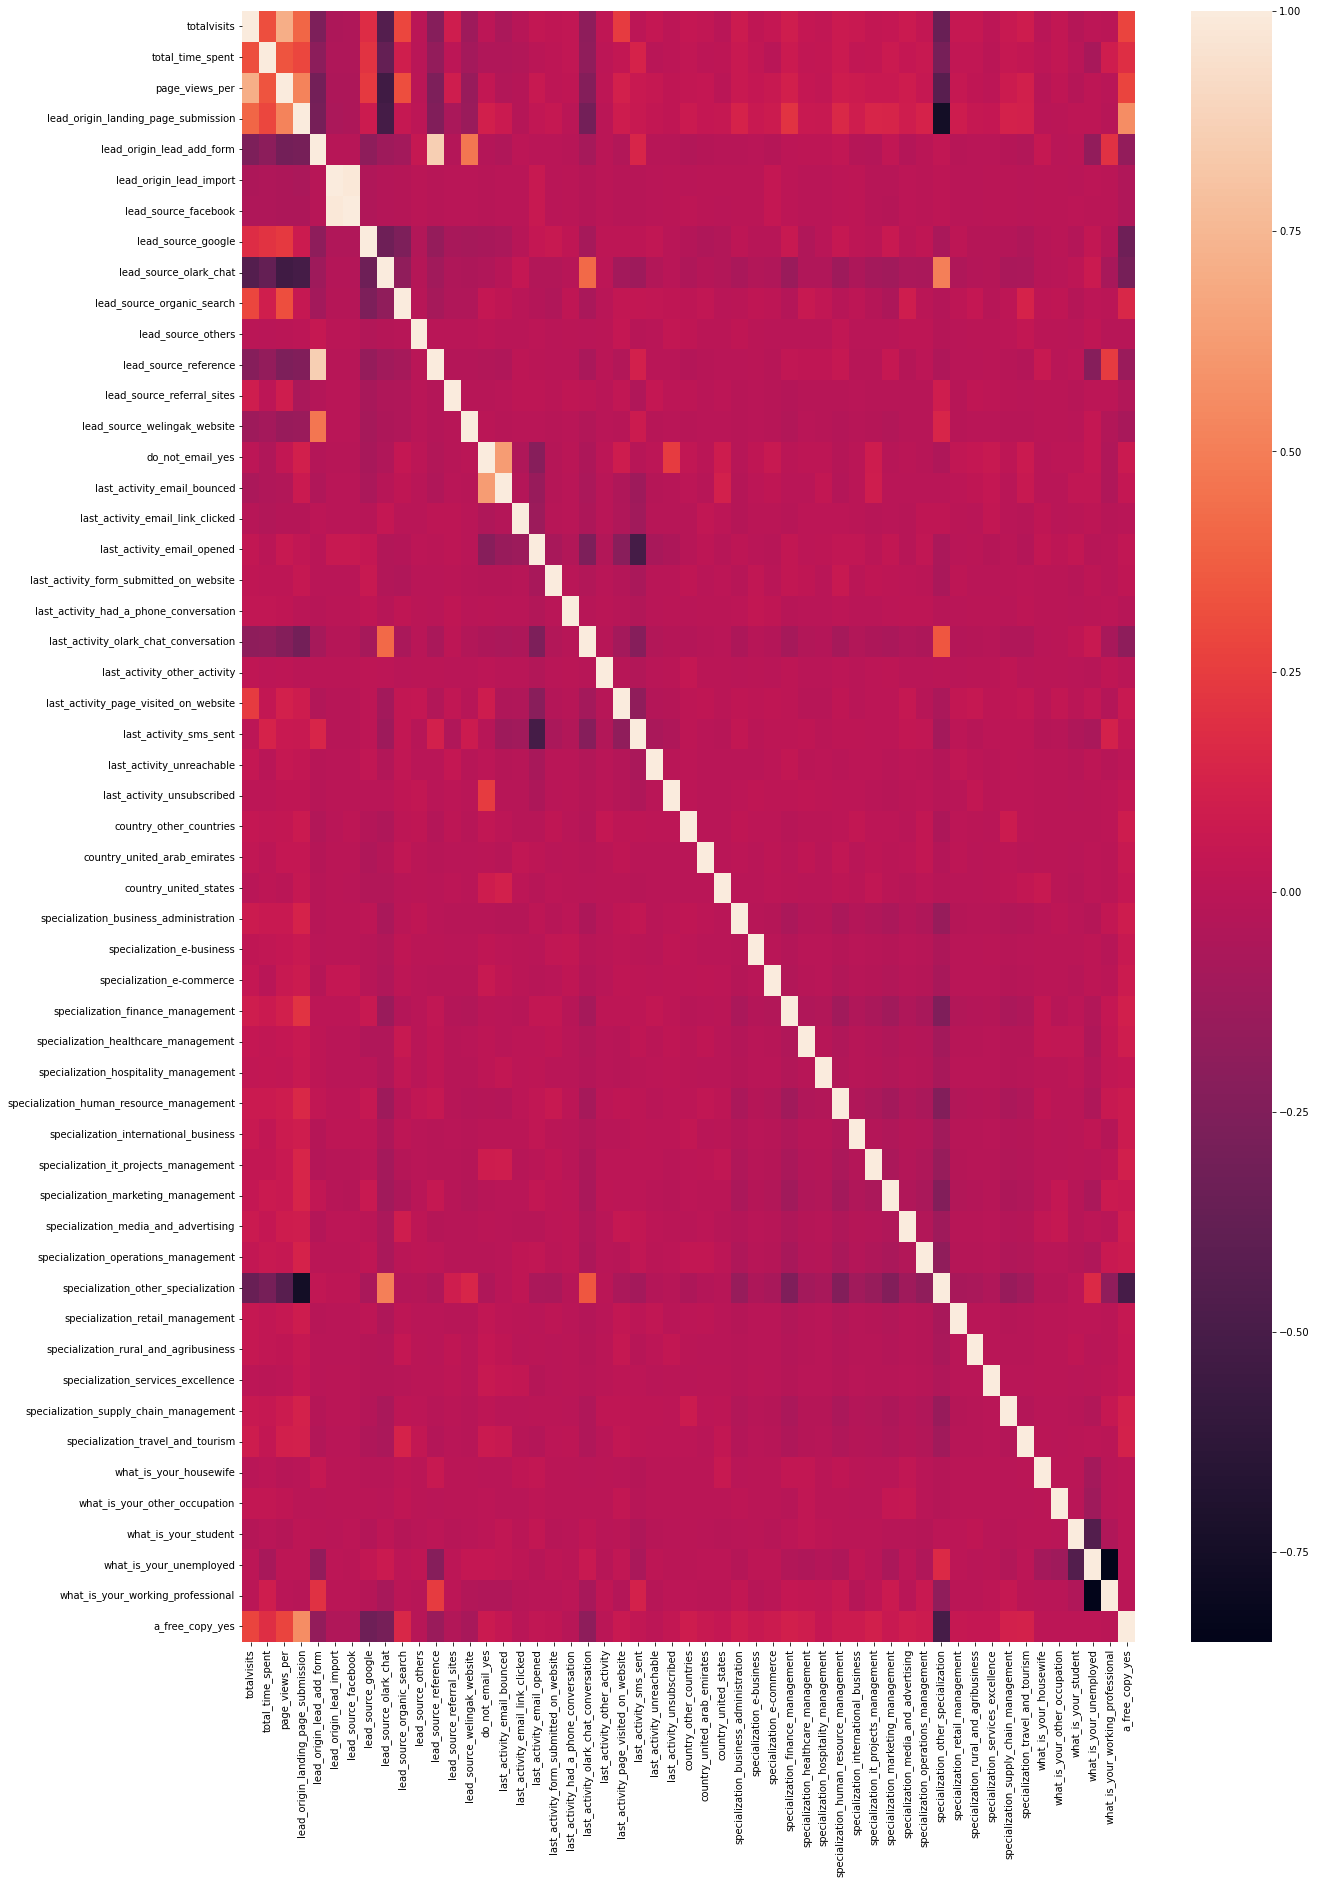

In [80]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

<font color= green>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## 5. Model Building 

In [81]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
# Import RFE
from sklearn.feature_selection import RFE

In [83]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [84]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('totalvisits', False, 2),
 ('total_time_spent', True, 1),
 ('page_views_per', False, 3),
 ('lead_origin_landing_page_submission', True, 1),
 ('lead_origin_lead_add_form', True, 1),
 ('lead_origin_lead_import', False, 7),
 ('lead_source_facebook', False, 22),
 ('lead_source_google', False, 29),
 ('lead_source_olark_chat', True, 1),
 ('lead_source_organic_search', False, 32),
 ('lead_source_others', False, 23),
 ('lead_source_reference', True, 1),
 ('lead_source_referral_sites', False, 21),
 ('lead_source_welingak_website', True, 1),
 ('do_not_email_yes', True, 1),
 ('last_activity_email_bounced', False, 39),
 ('last_activity_email_link_clicked', False, 16),
 ('last_activity_email_opened', False, 5),
 ('last_activity_form_submitted_on_website', False, 38),
 ('last_activity_had_a_phone_conversation', True, 1),
 ('last_activity_olark_chat_conversation', True, 1),
 ('last_activity_other_activity', True, 1),
 ('last_activity_page_visited_on_website', False, 17),
 ('last_activity_sms_sent',

In [85]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['total_time_spent', 'lead_origin_landing_page_submission',
       'lead_origin_lead_add_form', 'lead_source_olark_chat',
       'lead_source_reference', 'lead_source_welingak_website',
       'do_not_email_yes', 'last_activity_had_a_phone_conversation',
       'last_activity_olark_chat_conversation', 'last_activity_other_activity',
       'last_activity_sms_sent', 'last_activity_unsubscribed',
       'specialization_other_specialization', 'what_is_your_housewife',
       'what_is_your_working_professional'],
      dtype='object')

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [86]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [87]:
# Importing statsmodels
import statsmodels.api as sm

In [88]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.8
Date:                Mon, 17 Oct 2022   Deviance:                       5325.6
Time:                        22:26:51   Pearson chi2:                 6.83e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3374      0.132    -10.139      0.000      -1.596      -1.079
total_time_spent                           4.4968      0.162     27.673      0.000       4.178       4.815
lead_origin_landing_page_submission       -1.1526      0.126     -9.150      0.000      -1.399      -0.906
lead_origin_lead_add_form                  1.5800      0.898      1.760      0.078      -0.180       3.340
lead_source_olark_chat                     1.1892      0.121      9.808      0.000       0.952       1.427
lead_source_reference                      1.7896      0.921      1.943      0.052      -0.016       3.595
lead_source_welingak_website               4.3745      1.153      3.794      0.000       2.114       6.635
do_not_email_yes                          -1.7994      0.184     -9.769      0.000      -2.160      -1.438
last_activity_had_a_phone_conversation     2.8282      0.743      3.805      0.000       1.371       4.285
last_activity_olark_chat_conversation     -1.3874      0.165     -8.397      0.000      -1.711      -1.064
last_activity_other_activity               1.3416      0.581      2.310      0.021       0.203       2.480
last_activity_sms_sent                     1.3879      0.074     18.759      0.000       1.243       1.533
last_activity_unsubscribed                 1.5521      0.472      3.290      0.001       0.627       2.477
specialization_other_specialization       -1.2020      0.123     -9.742      0.000      -1.444      -0.960
what_is_your_housewife                    22.9462   1.51e+04      0.002      0.999   -2.96e+04    2.96e+04
what_is_your_working_professional          2.6269      0.191     13.749      0.000       2.252       3.001
==========================================================================================================
"""

In [89]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,lead_origin_lead_add_form,62.37
4,lead_source_reference,48.06
5,lead_source_welingak_website,15.50
12,specialization_other_specialization,2.16
0,total_time_spent,2.00
1,lead_origin_landing_page_submission,1.98
3,lead_source_olark_chat,1.94
10,last_activity_sms_sent,1.57
8,last_activity_olark_chat_conversation,1.45
14,what_is_your_working_professional,1.20


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'what_is_your_housewife'___</font>

In [91]:
X_train.drop('what_is_your_housewife', axis = 1, inplace = True)

In [92]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2667.4
Date:                Mon, 17 Oct 2022   Deviance:                       5334.9
Time:                        22:26:51   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3300      0.132    -10.096      0.000      -1.588      -1.072
total_time_spent                           4.4940      0.162     27.688      0.000       4.176       4.812
lead_origin_landing_page_submission       -1.1526      0.126     -9.162      0.000      -1.399      -0.906
lead_origin_lead_add_form                  1.5768      0.898      1.756      0.079      -0.183       3.336
lead_source_olark_chat                     1.1879      0.121      9.802      0.000       0.950       1.425
lead_source_reference                      1.8064      0.921      1.961      0.050       0.001       3.612
lead_source_welingak_website               4.3777      1.153      3.796      0.000       2.118       6.638
do_not_email_yes                          -1.8023      0.184     -9.785      0.000      -2.163      -1.441
last_activity_had_a_phone_conversation     2.8227      0.743      3.798      0.000       1.366       4.279
last_activity_olark_chat_conversation     -1.3899      0.165     -8.412      0.000      -1.714      -1.066
last_activity_other_activity               1.3375      0.581      2.302      0.021       0.199       2.476
last_activity_sms_sent                     1.3829      0.074     18.703      0.000       1.238       1.528
last_activity_unsubscribed                 1.5499      0.472      3.285      0.001       0.625       2.474
specialization_other_specialization       -1.2066      0.123     -9.788      0.000      -1.448      -0.965
what_is_your_working_professional          2.6222      0.191     13.725      0.000       2.248       2.997
==========================================================================================================
"""

In [93]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,lead_origin_lead_add_form,62.37
4,lead_source_reference,48.06
5,lead_source_welingak_website,15.50
12,specialization_other_specialization,2.16
0,total_time_spent,2.00
1,lead_origin_landing_page_submission,1.98
3,lead_source_olark_chat,1.94
10,last_activity_sms_sent,1.57
8,last_activity_olark_chat_conversation,1.45
13,what_is_your_working_professional,1.20


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'lead_origin_lead_add_form'___</font>

In [94]:
X_train.drop('lead_origin_lead_add_form', axis = 1, inplace = True)

In [95]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2669.1
Date:                Mon, 17 Oct 2022   Deviance:                       5338.2
Time:                        22:26:51   Pearson chi2:                 6.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3083      0.131     -9.974      0.000      -1.565      -1.051
total_time_spent                           4.4850      0.162     27.675      0.000       4.167       4.803
lead_origin_landing_page_submission       -1.1710      0.125     -9.331      0.000      -1.417      -0.925
lead_source_olark_chat                     1.1807      0.121      9.760      0.000       0.944       1.418
lead_source_reference                      3.3683      0.240     14.024      0.000       2.898       3.839
lead_source_welingak_website               5.9454      0.731      8.137      0.000       4.513       7.378
do_not_email_yes                          -1.8038      0.184     -9.794      0.000      -2.165      -1.443
last_activity_had_a_phone_conversation     2.8180      0.743      3.791      0.000       1.361       4.275
last_activity_olark_chat_conversation     -1.3940      0.165     -8.438      0.000      -1.718      -1.070
last_activity_other_activity               1.3347      0.581      2.298      0.022       0.197       2.473
last_activity_sms_sent                     1.3830      0.074     18.708      0.000       1.238       1.528
last_activity_unsubscribed                 1.5484      0.472      3.283      0.001       0.624       2.473
specialization_other_specialization       -1.2191      0.123     -9.899      0.000      -1.460      -0.978
what_is_your_working_professional          2.6189      0.191     13.705      0.000       2.244       2.993
==========================================================================================================
"""

In [96]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,specialization_other_specialization,2.16
0,total_time_spent,1.99
1,lead_origin_landing_page_submission,1.98
2,lead_source_olark_chat,1.94
9,last_activity_sms_sent,1.57
7,last_activity_olark_chat_conversation,1.45
12,what_is_your_working_professional,1.20
5,do_not_email_yes,1.18
3,lead_source_reference,1.17
4,lead_source_welingak_website,1.09


<font color= green>___All the VIF values are below 2.20 and all the p-values are below 0.05. So we can fix model.___</font>

## 6. Making Prediction

In [97]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.157166
1012    0.075827
9226    0.509074
4750    0.843446
7987    0.890428
1281    0.708111
2880    0.077895
4971    0.958562
7536    0.818462
1248    0.872119
dtype: float64

In [98]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15716571, 0.07582729, 0.50907372, 0.84344618, 0.89042791,
       0.70811108, 0.07789526, 0.95856176, 0.81846176, 0.87211949])

In [99]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.157166
1,0,0.075827
2,0,0.509074
3,1,0.843446
4,1,0.890428


In [100]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Converted_Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Converted_Predicted
0,0,0.157166,0
1,0,0.075827,0
2,0,0.509074,1
3,1,0.843446,1
4,1,0.890428,1


## 7. Model Evaluation

In [101]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [102]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_Predicted )
confusion

array([[3434,  471],
       [ 726, 1720]], dtype=int64)

In [103]:
# Predicted     not_churn    churn
# Actual
# not_churn        3434       471
# churn             726      1720

In [104]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Predicted)

0.8115257439773264

<font color= green>___That's around 81.15% accuracy which is a very good value___</font>

In [105]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [106]:
# Calculating the sensitivity
TP/(TP+FN)

0.7031888798037612

In [107]:
# Calculating the specificity
TN/(TN+FP)

0.8793854033290653

<font color= green>___With the current cut off as 0.5 we have around 81.15% accuracy, sensitivity of around 70% and specificity of around 88%.___</font>

In [108]:
## Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1206145966709347


In [109]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7850296668188042


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8254807692307692


## Precision-Recall

With the current cut off of 0.50, Precision and recall:-

In [111]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7850296668188042

In [112]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7031888798037612

## With the Current cut off of 0.5,
1. Accurracy--81.15%
2. Sensitivity--70.31%
3. Specificity--87.93%
4. Precision--78.50%
5. Recall-70.31%

## 8.0 Optimal Cut off (ROC Curve)

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

The previous cut off was randomely selected. Now to find the optimum one

In [113]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

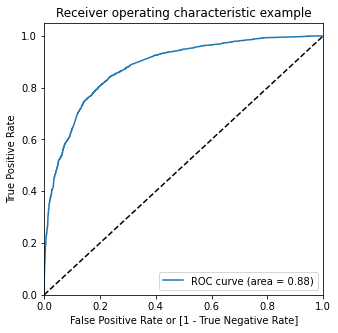

In [115]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.88 which is a very good value.___</font>

In [116]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Converted_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.157166,0,1,1,0,0,0,0,0,0,0,0
1,0,0.075827,0,1,0,0,0,0,0,0,0,0,0
2,0,0.509074,1,1,1,1,1,1,1,0,0,0,0
3,1,0.843446,1,1,1,1,1,1,1,1,1,1,0
4,1,0.890428,1,1,1,1,1,1,1,1,1,1,0


In [117]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.598646,0.969747,0.366197
0.2,0.2,0.729019,0.923140,0.607426
0.3,0.3,0.793733,0.840965,0.764149
0.4,0.4,0.808849,0.766558,0.835339
0.5,0.5,0.811526,0.703189,0.879385
0.6,0.6,0.793891,0.590760,0.921127
0.7,0.7,0.780507,0.509812,0.950064
0.8,0.8,0.754684,0.411284,0.969782
0.9,0.9,0.709495,0.264513,0.988220


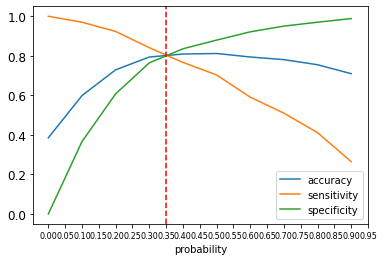

In [118]:
# Plotting it
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.35, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

<font color= green>___From the graph it is visible that the optimal cut off is at 0.35.___</font>

In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Converted_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.157166,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.075827,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.509074,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.843446,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.890428,1,1,1,1,1,1,1,1,1,1,0,1


## Assigning Lead Score

In [120]:
y_train_pred_final['lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Converted_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_Score
0,0,0.157166,0,1,1,0,0,0,0,0,0,0,0,0,16
1,0,0.075827,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.509074,1,1,1,1,1,1,1,0,0,0,0,1,51
3,1,0.843446,1,1,1,1,1,1,1,1,1,1,0,1,84
4,1,0.890428,1,1,1,1,1,1,1,1,1,1,0,1,89


In [121]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8039678790741616

In [122]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3140,  765],
       [ 480, 1966]], dtype=int64)

In [123]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [124]:
# Calculating the sensitivity
TP/(TP+FN)

0.803761242845462

In [125]:
# Calculating the specificity
TN/(TN+FP)

0.8040973111395646

In [126]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19590268886043533


In [127]:
# Calculate True postive rate - predicting churn when customer does have churned
print(TP/ float(TP+FN))

0.803761242845462


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8674033149171271


In [129]:
# Precision
print(TP/float(TP+FP))

0.7198828268033687


In [130]:
# Recall
print(TP/float(TP+FN))

0.803761242845462


In [131]:
metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7595132316013135

## With the Current cut off of 0.35, Metrics Score on Train Data Set are
1. Accurracy--80.40%
2. Sensitivity--80.38%
3. Specificity--80.41%
4. Precision--72%
5. Recall-80.38%
6. True Positive rate--75.59%
7. False Positive Rate--19.59%
8. Positive Prediction Value--72%%
9. Negative Prediction Value--86.74%
10. F1_Score--75.95%

## Model 2(logm3) 
with cut off value at 0.35 is providing an Accuracy of 80.40%, Sensitivity of 80.38%. Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting. More than 80% is what the CEO has requested in this case study. F1 Score and precision value in the model has higher number for 0's than 1's. This indicates that the model predicts leads which will not convert ( i.e. filtering leads who will not convert) than the leads which will convert. This indirectly improved the model's performance to identify correct leads to be contacted

### 9.0. Precision and recall tradeoff on Train Set

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.Converted_Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Converted_Predicted, Length: 6351, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

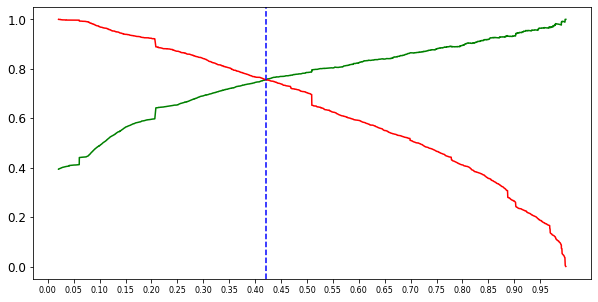

In [135]:
plt.figure(figsize=(10,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.42, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Converted_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_Score
0,0,0.157166,0,1,1,0,0,0,0,0,0,0,0,0,16
1,0,0.075827,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.509074,1,1,1,1,1,1,1,0,0,0,0,1,51
3,1,0.843446,1,1,1,1,1,1,1,1,1,1,0,1,84
4,1,0.890428,1,1,1,1,1,1,1,1,1,1,0,1,89


In [137]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8115257439773264

In [138]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3305,  600],
       [ 597, 1849]], dtype=int64)

In [139]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [140]:
# Calculating the sensitivity
TP/(TP+FN)

0.7559280457890434

In [141]:
# Calculating the specificity
TN/(TN+FP)

0.8463508322663252

In [142]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.15364916773367476


In [143]:
# Calculate True postive rate - predicting churn when customer does have churned
print(TP/ float(TP+FN))

0.7559280457890434


In [144]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8470015376729882


In [145]:
# Precision = TP / TP + FP
print(TP /float(TP + FP))

0.7550020416496529


In [146]:
#Recall = TP / TP + FN
print(TP /float(TP + FN))

0.7559280457890434


In [147]:
metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7554647599591419

## With the Current cut off of 0.42, Metrics Score on Train Data Set are
1. Accurracy--81.15%
2. Sensitivity--75.59%
3. Specificity--84.63%
4. Precision--75.50%
5. Recall-75.59%
6. True Positive rate--75.59%
7. false Positive Rate--15.36%
8. Positive Prediction Value--75.50%%
9. Negative Prediction Value--86.73%
10. F1_Score--75.55%

## Inferences:
By using the Precision - Recall trade off chart cut-off points, the model output has changed the following way :<br>
True Positive number has decreased.<br>
True Negative number has increased.<br>
False Negative number has increased.<br>
False Positive number has decreased.<br>


For our purpose CEO wants to identify the people correctly who will convert to leads. Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive. We have to increase Sensitivity / Recall value to increase True Positives. Thus we will use 0.35 as cutoff point.

## 9.2. Prediction on Test set based on ROC curve & Sentivity and specificity Tradeoff

In [148]:
# Scaling numeric values
X_test[['totalvisits','total_time_spent','page_views_per']] = scaler.transform(X_test[['totalvisits','total_time_spent','page_views_per']])

In [149]:
# Substituting all the columns in the final train model
col = X_train.columns

In [150]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,total_time_spent,lead_origin_landing_page_submission,lead_source_olark_chat,lead_source_reference,lead_source_welingak_website,do_not_email_yes,last_activity_had_a_phone_conversation,last_activity_olark_chat_conversation,last_activity_other_activity,last_activity_sms_sent,last_activity_unsubscribed,specialization_other_specialization,what_is_your_working_professional
3271,1.0,0.070530,0,0,0,0,0,0,0,0,0,0,1,0
1490,1.0,0.679695,1,0,0,0,0,0,0,0,0,0,0,1
7936,1.0,0.033243,0,0,0,0,0,0,0,0,0,0,1,0
4216,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0
3830,1.0,0.073675,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.372417,1,0,0,0,0,0,0,0,0,0,0,0
2879,1.0,0.264600,1,0,0,0,0,0,0,0,0,0,0,0
6501,1.0,0.599730,1,0,0,0,0,0,0,0,1,0,0,0
7155,1.0,0.231357,1,0,0,0,0,0,0,0,0,0,0,0


In [151]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_test_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_test_pred_final.head()


,converted,Conversion_Prob
0,0,0.098762
1,1,0.960380
2,0,0.084843
3,1,0.886953
4,0,0.104432


In [152]:
# Making prediction using cut off 0.35
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final

,converted,Conversion_Prob,final_predicted
0,0,0.098762,0
1,1,0.960380,1
2,0,0.084843,0
3,1,0.886953,1
4,0,0.104432,0
...,...,...,...
2718,0,0.308089,0
2719,0,0.215409,0
2720,1,0.831098,1
2721,0,0.191279,0


In [153]:
y_test_pred_final['lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_test_pred_final.head()

,converted,Conversion_Prob,final_predicted,lead_Score
0,0,0.098762,0,16
1,1,0.960380,1,8
2,0,0.084843,0,51
3,1,0.886953,1,84
4,0,0.104432,0,89


In [154]:
# Check the overall accuracy
metrics.accuracy_score(y_test_pred_final['converted'], y_test_pred_final.final_predicted)

0.8013220712449505

In [155]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_test_pred_final['converted'], y_test_pred_final.final_predicted )
confusion2

array([[1389,  345],
       [ 196,  793]], dtype=int64)

In [156]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [157]:
# Calculating the sensitivity
TP/(TP+FN)

0.8018200202224469

In [158]:
# Calculating the specificity
TN/(TN+FP)

0.801038062283737

In [159]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19896193771626297


In [160]:
# Calculate True postive rate - predicting churn when customer does have churned
print(TP/ float(TP+FN))

0.8018200202224469


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8763406940063091


In [162]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.6968365553602812

In [163]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8018200202224469

In [164]:
metrics.f1_score(y_test_pred_final.converted, y_test_pred_final.final_predicted)

0.7456511518570758

## With the Current cut off of 0.35, Metrics Score on Test Data Set are
1. Accurracy--80.13%
2. Sensitivity--80.18%
3. Specificity--80.10%
4. Precision--69.68%
5. Recall-80.18%
6. True Positive rate--80.18%
7. False Positive Rate--19.89%
8. Positive Prediction Value--69.68%
9. Negative Prediction Value--87.63%
10. F1_Score--74.56%

## Inferences:
The sensitivity value on Test data is 80.18% vs 80.38% in Train data. The accuracy values is 80.13%. It shows that model is performing well in test data set also and is not over-trained.

## 11.0 Model Features / Predictors

In [165]:
# Let's look into final model features and coefficients 
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': res.params[1:]})
importances = importances.sort_values(by='Importance', ascending=False)

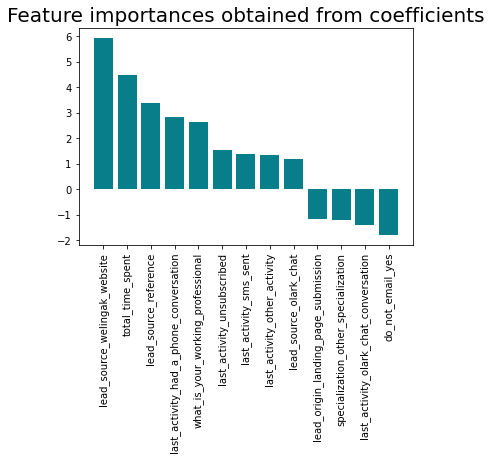

In [166]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [167]:
importances

,Attribute,Importance
lead_source_welingak_website,lead_source_welingak_website,5.945422
total_time_spent,total_time_spent,4.484989
lead_source_reference,lead_source_reference,3.368308
last_activity_had_a_phone_conversation,last_activity_had_a_phone_conversation,2.818029
what_is_your_working_professional,what_is_your_working_professional,2.618916
last_activity_unsubscribed,last_activity_unsubscribed,1.548396
last_activity_sms_sent,last_activity_sms_sent,1.382998
last_activity_other_activity,last_activity_other_activity,1.334686
lead_source_olark_chat,lead_source_olark_chat,1.180687
lead_origin_landing_page_submission,lead_origin_landing_page_submission,-1.171029


## 12.0 Model Summary

Interpretation Logistic regression model with multiple predictor variables
In general, we can have multiple predictor variables in a logistic regression model as below:

logit(p) = log(p/(1-p))= β0 + β1* X1 + … + βn * Xn

Applying such a model to our example dataset, each estimated coefficient is the expected change in the log odds of being a potential lead for a unit increase in the corresponding predictor variable holding the other predictor variables constant at a certain value. Each exponentiated coefficient is the ratio of two odds, or the change in odds in the multiplicative scale for a unit increase in the corresponding predictor variable holding other variables at a certain value.

## The magnitude and sign of the coefficients loaded in the logit function:

logit(p) = log(p/(1-p))=-0.3325+(lead_source_welingak_websiteX5.95)+(lead_source_referenceX3.37)+(last_activity_had_a_phone_conversationX2.82)
(what_is_your_working_professionalX2.62)+(last_activity_unsubscribedX1.55)+(last_activity_sms_sentX1.38)+(last_activity_other_activityX1.33)
(lead_source_olark_chatX1.18)+(total_time_spentX4.485)+(lead_origin_landing_page_submissionX-1.17)+(specialization_other_specializationX-1.22)
+(last_activity_olark_chat_conversationX-1.39)+(do_not_email_yesX-1.80).

We can make predictions from the estimates. We do this by computing the effects for all of the predictors for a particular scenario, adding them up, and applying a logistic transformation.
Consider the scenario of a lead who is a working professional and who was identified from Welingak website and who had chatted on Olark Chat and who spent no time on the website and wanted to be contacted by E-mail.

In [168]:
logit=-0.3325+(5.95*1)+(2.62*1)-(1.39*1)
logit

6.847500000000001

In [169]:
## The logistic Transformation
import math
Probability= 1 /(1 + math.exp(-6.8475))
Probability

0.9989390192300881

To understand odds ratios we first need a definition of odds, which is the ratio of the probabilities of two mutually exclusive outcomes. Consider our prediction of the probability of lead conversion of 10% from the earlier section on probabilities. As the probability of lead conversion is 10%, the probability of non-conversion is 100% - 10% = 90%, and thus the odds are 10% versus 90%. Dividing both sides by 90% gives us 0.11 versus 1, which we can just write as 0.11. So, the odds of 0.11 is just a different way of saying a probability of lead conversion of 10%.

## Similarly 
We can interpret from the model that, holding all categorical and numerical variables at a fixed value, the odds of a lead being converted for a Working Professional (Working Professional = 1)over the odds of lead being converted for non-working professionals (Working Professional = 0) 